<a href="https://colab.research.google.com/github/santoshkumarbvp/Deep-Learning/blob/main/Hate_Speech_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hate speech classification via deep learning

  classes -
   
    hate speech

    offensive language
    
    neither

In [3]:
import pandas as pd

In [10]:
df = pd.read_csv('https://raw.githubusertweet.com/laxmimerit/hate_speech_dataset/master/data.csv' , index_col=0)

In [13]:
df.head()

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [32]:
vc=df['class'].value_counts()
vc

1    19190
2     4163
0     1430
Name: class, dtype: int64

This contains unbalanced classes. 
Will balance the complete dataset. 

---






In [18]:
df[df['class']==1].sample()

(19190, 6)

index for min and max count 

In [41]:
vc[vc==vc.min()].index[0], vc[vc==vc.max()].index[0]

(0, 1)

In [42]:
df[df['class']==vc[vc==vc.max()].index[0]].shape

(19190, 6)

just picking only 1430 samples from class 1

In [48]:
df_new = pd.DataFrame()

for i in vc.index:
  temp = df[df['class']==i].sample(vc.min())
  df_new = df_new.append(temp,ignore_index = True)  

In [49]:
df_new.shape

(4290, 6)

In [147]:
%%time

contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
def contraction_(x):
    for cont , exp in contraction_mapping.items():
        x = re.sub(cont,exp,x)
    return x

import unicodedata
def remove_accented_chars(x):
    x = unicodedata.normalize('NFKD', x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

#email
regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"

import re
from bs4 import BeautifulSoup

from spacy.lang.en.stop_words import STOP_WORDS as stopwords

import spacy
nlp = spacy.load('en_core_web_sm')

def convert_to_root(x):
    doc= nlp(x)
    x_list=[]
    for w in doc:
        root = w.lemma_
        x_list.append(root)
    return ' '.join(x_list)


def get_clean_data(df_new):
  df_new['tweet']=df_new['tweet'].apply(lambda x: x.lower() )
  df_new['tweet']=df_new['tweet'].apply(lambda x: contraction_(x))
  df_new['tweet']=df_new['tweet'].apply(lambda x : re.sub('[a-zA-Z0-9_-]*@[a-zA-Z0-9_-]+\.com',' ', x))
  df_new['tweet']=df_new['tweet'].apply(lambda x : re.sub(regex, '', x))
  df_new['tweet']=df_new['tweet'].apply(lambda x : re.sub('[^\w ]+','',x))
  df_new['tweet']=df_new['tweet'].apply(lambda x : re.sub('\s{2,}',' ',x))
  df_new['tweet']=df_new['tweet'].apply(lambda x : BeautifulSoup(x,'html').get_text().strip())
  df_new['tweet']=df_new['tweet'].apply(lambda x : remove_accented_chars(x))
  df_new['tweet']=df_new['tweet'].apply(lambda x : ' '.join([w for w in x.split() if w not in stopwords]))
  df_new['tweet']=df_new['tweet'].apply(lambda x : convert_to_root(x))
  return df_new

CPU times: user 669 ms, sys: 68.3 ms, total: 737 ms
Wall time: 737 ms


In [52]:
df_new

,count,hate_speech,offensive_language,neither,class,tweet
0,3,0,3,0,1,ray rice bitch xans lean punch
1,3,0,3,0,1,bad bitch
2,3,0,3,0,1,1000gramsbee bitch
3,3,0,3,0,1,rt fredosantana300 bitch forget hit
4,3,0,3,0,1,act like little booshie bitch friend hoe
...,...,...,...,...,...,...
4285,3,3,0,0,0,maliktender gayer 2 faggot bed together128129
4286,3,2,1,0,0,ok bitch wut think shesaid believe u describe ...
4287,3,2,1,0,0,rt lady_blahblah furrybah paypay voice rt 80sb...
4288,3,2,1,0,0,scandal negro bed wenchs fairytale propaganda ...


In [116]:
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Dropout, Conv1D, MaxPool1D, GlobalMaxPooling1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam

In [54]:
from sklearn.model_selection import train_test_split

Tokenization

In [55]:
text = df_new['tweet'].tolist()

In [58]:
text[:2]

['ray rice bitch xans lean punch', 'bad bitch']

In [59]:
token = Tokenizer()
token.fit_on_texts(text)

In [81]:
token.word_counts.keys()

odict_keys(['ray', 'rice', 'bitch', 'xans', 'lean', 'punch', 'bad', '1000gramsbee', 'rt', 'fredosantana300', 'forget', 'hit', 'act', 'like', 'little', 'booshie', 'friend', 'hoe', 'see', 'sweater', 'flashy', 'wanna', 'get', 'to', 'boyfriend', 'puppy', '128514128514128514', '8220purrdylaylayxxx', 'im', 'yung', 'jay', 'yo', 'mama', 'confuse', 'u8221', 'lol', 'manner', 'uptmillz', '128514', 'dimpledjoint', 'interesting', 'curtyndacut', 'ur', 'child', 'father', 'be', 'not', 'shitthen', 'look', 'mirror', 'dumb', '8230', 'people', 'ass', 'niggas', 'amp', 'stay', 'far', 'away', 'preppy', 'argue', 'party', 'bottle', 'fr', 'marcus2kings', 'yeah', 'nigga', '128532128532128532', 'tyler', 'smith55', 'talk', 'hick', 'san', 'antonio', 'ride', 'big', '45', 'console', 'lyvvvm', 'lmao', 'mind', 'help', 'fuck', 'theses', 'dawg', 'morningjoe', 'prove', 'wrong', 'rightie', 'liberal', 'use', 'fact', 'con', 'emotion', 'decision', 'damn', 'teabagger', 'motto', 'ozwashere', 'urself', 'man', 'u', 'girl', 'fucki

In [83]:
token.index_word[40]

'yellow'

In [86]:
x = ['learn to grow']

In [87]:
token.texts_to_sequences(x)

[[398, 36, 256]]

In [88]:
vocab_size = len(token.word_counts) + 1

In [89]:
encoded_data = token.texts_to_sequences(text)

In [91]:
len(encoded_data)

4290

In [95]:
encoded_data[:2]

[[751, 514, 2, 3262, 3263, 1089], [41, 2]]

To fix the size of each tweet, will add the padding for each text seperately. 

In [92]:
max_len = 120
X = pad_sequences(encoded_data, maxlen = max_len, padding= 'post')

In [93]:
X

array([[  751,   514,     2, ...,     0,     0,     0],
       [   41,     2,     0, ...,     0,     0,     0],
       [ 3264,     2,     0, ...,     0,     0,     0],
       ...,
       [    1,   322, 11222, ...,     0,     0,     0],
       [ 1243,   447,   389, ...,     0,     0,     0],
       [11229,   810,   143, ...,     0,     0,     0]], dtype=int32)

In [96]:
X.shape

(4290, 120)

Model prepration 

In [99]:
y = df_new['class']

In [100]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4285    0
4286    0
4287    0
4288    0
4289    0
Name: class, Length: 4290, dtype: int64

In [101]:
from tensorflow.keras.utils import to_categorical

In [102]:
y = to_categorical(y)

In [104]:
y.shape

(4290, 3)

In [105]:
X.shape

(4290, 120)

In [140]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size= 0.2, random_state= 10, stratify = y)

In [109]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3432, 120), (858, 120), (3432, 3), (858, 3))

In [114]:
vec_size = 300

model = Sequential()
model.add(Embedding(vocab_size,vec_size, input_length=max_len))

model.add(Conv1D(32,2, activation='relu'))

model.add(MaxPooling1D(2))

model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))

model.add(GlobalMaxPooling1D())

model.add(Dense(3,activation='softmax'))

In [117]:

model.compile(optimizer=Adam(learning_rate=0.001) , loss='categorical_crossentropy', metrics = ['accuracy'])

In [118]:
model.fit(X_train,y_train,epochs=3, validation_data=(X_test,y_test), shuffle=True)

Epoch 1/3
108/108 [==============================] - 5s 47ms/step - loss: 0.8800 - accuracy: 0.6407 - val_loss: 0.6249 - val_accuracy: 0.7727
Epoch 2/3
108/108 [==============================] - 4s 41ms/step - loss: 0.4726 - accuracy: 0.8164 - val_loss: 0.5489 - val_accuracy: 0.7797
Epoch 3/3
108/108 [==============================] - 4s 41ms/step - loss: 0.2759 - accuracy: 0.8980 - val_loss: 0.5791 - val_accuracy: 0.7622


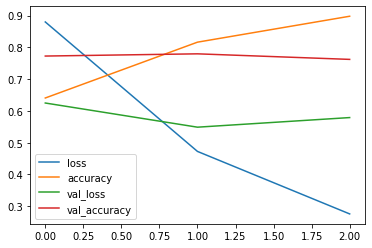

In [120]:
pd.DataFrame(model.history.history).plot()

Model Testing

In [121]:
from sklearn.metrics import confusion_matrix, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [127]:
y_pred = np.argmax(model.predict(X_test),axis=-1)

In [142]:
y_pred.shape

(858,)

In [139]:
y_test.shape

()

In [141]:
y_test= np.argmax(y_test,axis=-1)
y_test.shape

(858,)

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f3ec0c90278>)

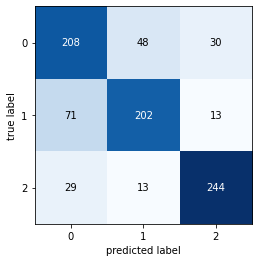

In [143]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

In [145]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       286
           1       0.77      0.71      0.74       286
           2       0.85      0.85      0.85       286

    accuracy                           0.76       858
   macro avg       0.76      0.76      0.76       858
weighted avg       0.76      0.76      0.76       858



Testing with custom data

In [202]:
x = 'hey bitch what you are doing. I will screw you'
# sorry for the sentence used above

In [203]:
x=token.texts_to_sequences([x])

In [204]:
x = pad_sequences(x, maxlen=max_len, padding='post')

In [205]:
x

array([[ 171,    2, 1192,  935, 2979,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)

In [206]:
np.argmax(model.predict(x), axis=-1)

array([1])

Classes are as below:

1 offensive 

0 hate 

2 neither


This is predicted by the model that the sentence used above is offensive.
